In [7]:
import cv2
import matplotlib.pyplot as plt
from patchify import patchify
import tensorflow as tf
import os

In [2]:
filename_img = "C:/Users/RAZER/Desktop/Test/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0.2500_main.png"
filename_mask = "C:/Users/RAZER/Desktop/Test/TCGA-A2-A1G6-DX1_xmin57706_ymin69514_MPP-0.2500_mask.png"

In [ ]:
 os.path.basename(img_path)

In [5]:


image = cv2.imread(filename_img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define patch size and stride
patch_size = [100, 100]  # Specify the size of each patch (height x width)
# We are using non-overlapping patch
stride = [100, 100]  # Specify the stride for patch extraction (height x width)

# Use tf.image.extract_patches to extract patches
patches = tf.image.extract_patches(
    images=tf.expand_dims(image, axis=0),  # Add a batch dimension
    sizes=[1, *patch_size, 1],  # Add batch and channel dimensions
    strides=[1, *stride, 1],  # Add batch and channel dimensions
    rates=[1, 1, 1, 1],  # Default rates
    padding='VALID'  # Use 'VALID' padding to ensure no padding is added
)

# Reshape the extracted patches
num_patches = patches.shape[1] * patches.shape[2]
print("Number of Patches: ",num_patches)

patches = tf.reshape(patches, [num_patches, *patch_size, 3])  # Assuming 3 channels for RGB images










Number of Patches:  684


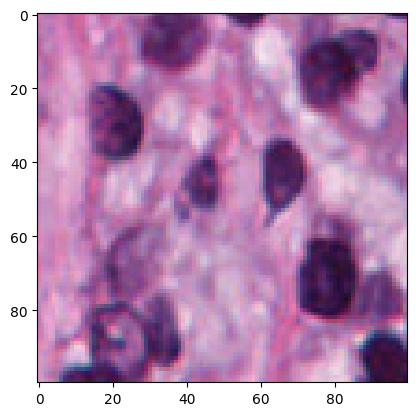

In [6]:
plt.imshow(patches[0].numpy())

In [ ]:
saving_path = "C:/Users/RAZER/Desktop/Test/patch_file/"

a=0
for i in patches:
        status = cv2.imwrite(saving_path+str(a)+'_image.png',i.numpy())
        print("Image written to file-system : ",status)
        a+=1